<a href="https://colab.research.google.com/github/jellydaniellie/cs6501-final/blob/main/ShainaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Schedule Parsing
!pip install icalendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import icalendar
from datetime import datetime, timedelta
import os
import json

# -------------------- SETTINGS --------------------
HOMEWORK_CSV = '/content/tasks.csv'
# [Id, SubjectId, Subject Name, Type, DueDate, Title, Detail, Progress, CompletedDate]
START_DATE = "2025-01-01"               # Modified Semester start date
END_DATE = "2025-04-26"                  # Semester end date
BUSY_HW_THRESHOLD = "mean"               # "mean", "median", or a fixed number
# ---------------------------------------------------

# -------------------- FUNCTIONS --------------------
def load_homework(csv_path, start_date, end_date):
    df = pd.read_csv(csv_path)
    df['DueDate'] = pd.to_datetime(df['DueDate'], errors='coerce')
    df = df[(df['DueDate'] >= start_date) & (df['DueDate'] <= end_date)]
    df = df[~df['Title'].str.contains('Exam|TEST', case=False, na=False)]
    hw_counts = df.groupby('DueDate').size()
    return hw_counts

def load_exams(csv_path, start_date, end_date):
    df = pd.read_csv(csv_path)
    df['DueDate'] = pd.to_datetime(df['DueDate'], errors='coerce')
    df = df[(df['DueDate'] >= start_date) & (df['DueDate'] <= end_date)]
    exam_keywords = ['Exam', 'TEST', 'MIDTERM', 'FINAL', 'Final', 'Presentation', 'Project', 'Capstone']
    mask = df['Title'].str.contains('|'.join(exam_keywords), case=False, na=False)
    df = df[mask]
    exam_counts = df.groupby('DueDate').size()
    return exam_counts

def determine_busy_days(counts, threshold_rule):
    if threshold_rule == "mean":
        threshold = counts.mean()
    elif threshold_rule == "median":
        threshold = counts.median()
    else:
        threshold = float(threshold_rule)
    return counts > threshold, threshold


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
start_date = pd.to_datetime(START_DATE)
end_date = pd.to_datetime(END_DATE)

# Daily homework and exam counts
hw_counts = load_homework(HOMEWORK_CSV, start_date, end_date)
exam_counts = load_exams(HOMEWORK_CSV, start_date, end_date)

# Create daily DataFrame
days = pd.date_range(start=start_date, end=end_date, freq='D')
daily_df = pd.DataFrame({'Date': days})

# Map homework and exams to each day
daily_df['Homework Assignments'] = daily_df['Date'].map(hw_counts).fillna(0)
daily_df['Exam Assignments'] = daily_df['Date'].map(exam_counts).fillna(0)
daily_df['School Assignments'] = daily_df['Homework Assignments'] + daily_df['Exam Assignments']

# Clean up types
daily_df['Homework Assignments'] = daily_df['Homework Assignments'].astype(int)
daily_df['Exam Assignments'] = daily_df['Exam Assignments'].astype(int)
daily_df['School Assignments'] = daily_df['School Assignments'].astype(int)

# -------------------- BUSY DAYS --------------------
busy_academic, hw_threshold = determine_busy_days(daily_df['Homework Assignments'], BUSY_HW_THRESHOLD)
busy_exams, exam_threshold = determine_busy_days(daily_df['Exam Assignments'], BUSY_HW_THRESHOLD)

daily_df['Busy Academic'] = busy_academic

# -------------------- LOAD LIFE EVENTS --------------------
# Load and clean life events
with open('/content/shaina_life_events.json', 'r') as f:
    life_events_data = f.read()

# Remove commented lines
life_events_lines = life_events_data.splitlines()
life_events_lines = [line for line in life_events_lines if not line.strip().startswith('//')]
clean_life_events_json = "\n".join(life_events_lines)

life_events = json.loads(clean_life_events_json)

# DataFrame
life_events_df = pd.DataFrame(life_events['events'])
life_events_df['date'] = pd.to_datetime(life_events_df['date'])

# Create Life Event Day binary column
life_event_days = pd.Series(0, index=daily_df['Date'])
life_event_days.loc[life_event_days.index.isin(life_events_df['date'])] = 1

daily_df['Life Event Day'] = daily_df['Date'].map(life_event_days).fillna(0).astype(int)

# -------------------- FINAL COMBINED SIGNIFICANT ACADEMIC DAY --------------------
daily_df['Significant_Academic_Day'] = (
    daily_df['Busy Academic'].astype(int) |
    (daily_df['Exam Assignments'] > 0).astype(int) |
    daily_df['Life Event Day']
)

# -------------------- DONE! --------------------
# Print the final DataFrame
print(daily_df[['Date',
                'Homework Assignments',
                'Exam Assignments',
                'Busy Academic',
                'Life Event Day',
                'Significant_Academic_Day']])

          Date  Homework Assignments  Exam Assignments  Busy Academic  \
0   2025-01-01                     0                 0          False   
1   2025-01-02                     0                 0          False   
2   2025-01-03                     0                 0          False   
3   2025-01-04                     0                 0          False   
4   2025-01-05                     0                 0          False   
5   2025-01-06                     0                 0          False   
6   2025-01-07                     0                 0          False   
7   2025-01-08                     0                 0          False   
8   2025-01-09                     0                 0          False   
9   2025-01-10                     0                 0          False   
10  2025-01-11                     0                 0          False   
11  2025-01-12                     0                 0          False   
12  2025-01-13                     0               

## **NOTES APP DATA**

Saving Book1.csv to Book1 (5).csv


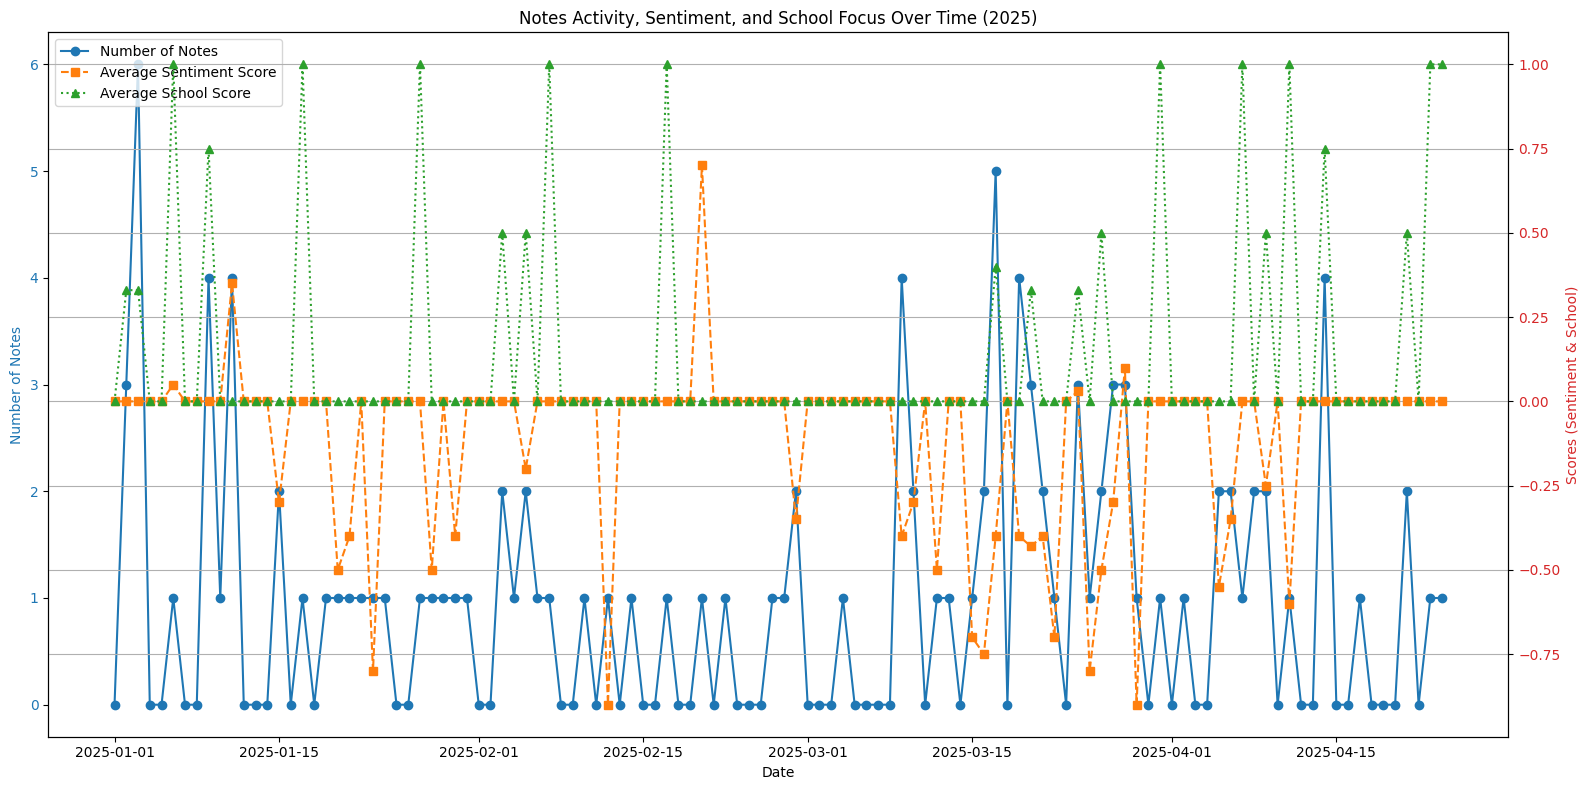

          Date  Number of Notes  Average Sentiment Score  Average School Score
0   2025-01-01              0.0                     0.00                  0.00
1   2025-01-02              3.0                     0.00                  0.33
2   2025-01-03              6.0                     0.00                  0.33
3   2025-01-04              0.0                     0.00                  0.00
4   2025-01-05              0.0                     0.00                  0.00
5   2025-01-06              1.0                     0.05                  1.00
6   2025-01-07              0.0                     0.00                  0.00
7   2025-01-08              0.0                     0.00                  0.00
8   2025-01-09              4.0                     0.00                  0.75
9   2025-01-10              1.0                     0.00                  0.00
10  2025-01-11              4.0                     0.35                  0.00
11  2025-01-12              0.0                     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()

import io

notes_df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
notes_df['Date'] = pd.to_datetime(notes_df['Date'], format='%m/%d/%y')

# Plot all three on one graph
fig, ax1 = plt.subplots(figsize=(16,8))

# First Y-axis: Number of Notes
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Notes', color=color)
ax1.plot(notes_df['Date'], notes_df['Number of Notes'], marker='o', color=color, label='Number of Notes')
ax1.tick_params(axis='y', labelcolor=color)

# Second Y-axis: Sentiment and School Score
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Scores (Sentiment & School)', color=color)
ax2.plot(notes_df['Date'], notes_df['Average Sentiment Score'], marker='s', linestyle='--', color='tab:orange', label='Average Sentiment Score')
ax2.plot(notes_df['Date'], notes_df['Average School Score'], marker='^', linestyle=':', color='tab:green', label='Average School Score')
ax2.tick_params(axis='y', labelcolor=color)

# Add legends properly
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Final touches
plt.title('Notes Activity, Sentiment, and School Focus Over Time (2025)')
plt.grid(True)
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()
# Print the full Notes DataFrame
print(notes_df)



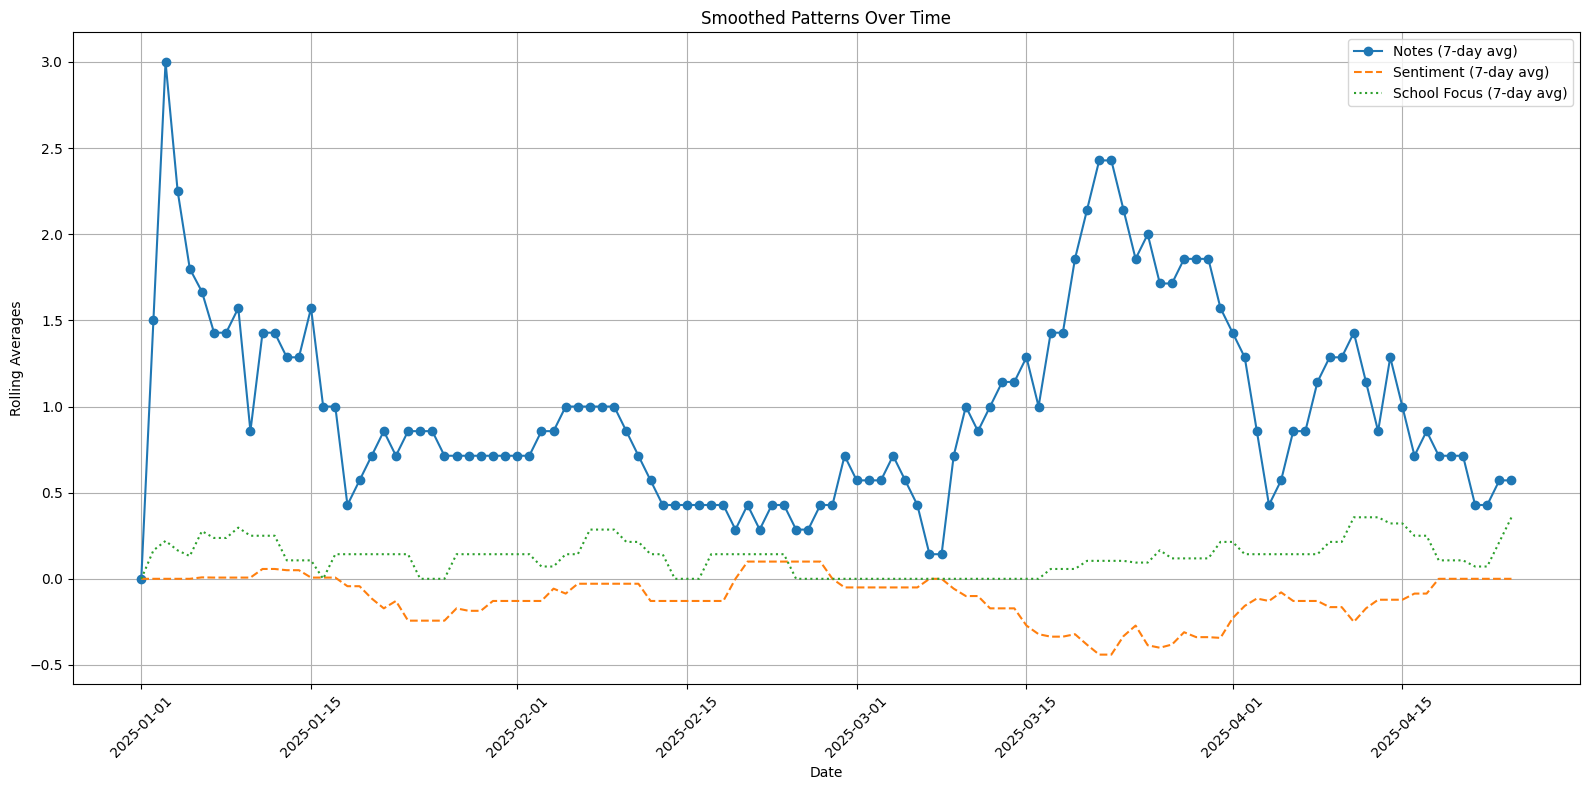

In [ ]:
# Calculate rolling averages (7-day) to smooth the data
notes_df['Notes Rolling Avg'] = notes_df['Number of Notes'].rolling(window=7, min_periods=1).mean()
notes_df['Sentiment Rolling Avg'] = notes_df['Average Sentiment Score'].rolling(window=7, min_periods=1).mean()
notes_df['School Rolling Avg'] = notes_df['Average School Score'].rolling(window=7, min_periods=1).mean()

# Plot smoothed patterns
plt.figure(figsize=(16,8))
plt.plot(notes_df['Date'], notes_df['Notes Rolling Avg'], label='Notes (7-day avg)', marker='o')
plt.plot(notes_df['Date'], notes_df['Sentiment Rolling Avg'], label='Sentiment (7-day avg)', linestyle='--')
plt.plot(notes_df['Date'], notes_df['School Rolling Avg'], label='School Focus (7-day avg)', linestyle=':')
plt.title('Smoothed Patterns Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Averages')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from google.colab import files
import io

# STEP 1: Upload file
uploaded = files.upload()

# STEP 2: Load your CSV file
notes_df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
notes_df['Date'] = pd.to_datetime(notes_df['Date'], format='%m/%d/%y')

# STEP 3: Set Date as index
notes_df.set_index('Date', inplace=True)

# STEP 4: Resample by WEEK
weekly_df = notes_df.resample('W').agg({
    'Number of Notes': 'sum',                      # weekly sum of notes
    'Average Sentiment Score': 'mean',              # weekly average sentiment
    'Average School Score': 'mean'                  # weekly average school score
}).reset_index()

# STEP 5: View the weekly dataframe
print(weekly_df)


Saving Book1.csv to Book1 (2).csv
         Date  Number of Notes  Average Sentiment Score  Average School Score
0  2025-01-05              9.0                 0.000000              0.132000
1  2025-01-12             10.0                 0.057143              0.250000
2  2025-01-19              4.0                -0.042857              0.142857
3  2025-01-26              5.0                -0.242857              0.000000
4  2025-02-02              5.0                -0.128571              0.142857
5  2025-02-09              7.0                -0.028571              0.285714
6  2025-02-16              3.0                -0.128571              0.000000
7  2025-02-23              3.0                 0.100000              0.142857
8  2025-03-02              4.0                -0.050000              0.000000
9  2025-03-09              5.0                -0.057143              0.000000
10 2025-03-16              7.0                -0.321429              0.000000
11 2025-03-23             15.0

### **NETFLIX**

In [ ]:
import pandas as pd
from google.colab import files

# Step 1: Upload the Netflix Viewing CSV
uploaded = files.upload()

# Step 2: Load the uploaded file
import io
netflix_df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

# Step 3: Filter to only Shaina's profile
shaina_df = netflix_df[netflix_df['Profile Name'] == 'Shaina']

# Step 4: Convert Start Time to datetime
shaina_df['Start Time'] = pd.to_datetime(shaina_df['Start Time'], errors='coerce')

# Step 5: Filter to only 2025
shaina_df = shaina_df[shaina_df['Start Time'].dt.year == 2025]

# Step 6: Exclude autoplayed
shaina_df = shaina_df[~shaina_df['Attributes'].str.contains('Autoplayed', na=False)]

# Step 7: Create 'Date' column
shaina_df['Date'] = shaina_df['Start Time'].dt.date

# Step 8: Convert Duration to total minutes
def duration_to_minutes(duration_str):
    try:
        h, m, s = map(int, duration_str.split(':'))
        return h * 60 + m + s / 60
    except:
        return 0

shaina_df['Minutes Watched'] = shaina_df['Duration'].apply(duration_to_minutes)

# Step 9: Group by Date
# - Sum minutes watched per day
# - Count number of distinct titles watched per day
watch_summary_per_day = shaina_df.groupby('Date').agg({
    'Minutes Watched': 'sum',
    'Title': 'nunique'  # nunique = number of unique titles
}).reset_index()

# Rename for clarity
watch_summary_per_day.rename(columns={'Title': 'Unique Titles Watched'}, inplace=True)

# Step 10: Display
print(watch_summary_per_day)

Saving ViewingActivity.csv to ViewingActivity (1).csv
          Date  Minutes Watched  Unique Titles Watched
0   2025-01-01        46.116667                      2
1   2025-01-02        32.300000                      2
2   2025-01-03         4.000000                      1
3   2025-01-04         8.250000                      1
4   2025-01-13        80.083333                      3
5   2025-01-14        15.300000                      2
6   2025-01-15        16.816667                      2
7   2025-01-16       138.900000                      4
8   2025-01-17        77.316667                      4
9   2025-01-18        47.816667                      2
10  2025-01-19       169.033333                      7
11  2025-01-20        99.533333                      4
12  2025-01-21        77.816667                      5
13  2025-01-22       106.250000                      4
14  2025-01-23        50.650000                      5
15  2025-01-24        40.383333                      3
16  2025-01

<ipython-input-84-88e1266ca07b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shaina_df['Start Time'] = pd.to_datetime(shaina_df['Start Time'], errors='coerce')


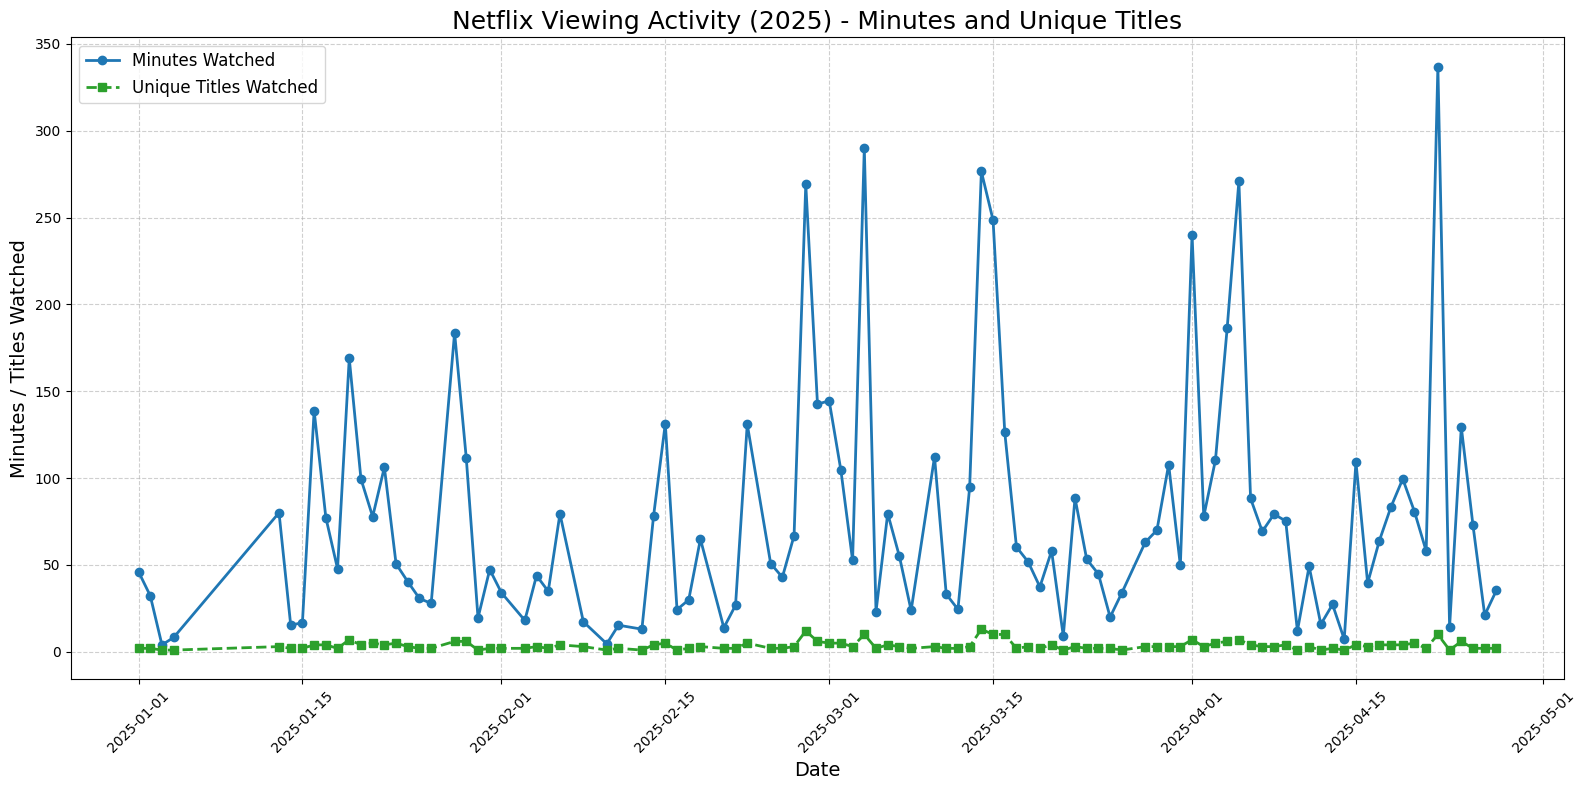

In [ ]:
import matplotlib.pyplot as plt

# Plot Netflix viewing activity
plt.figure(figsize=(16,8))

# Plot Minutes Watched per Day
plt.plot(watch_summary_per_day['Date'], watch_summary_per_day['Minutes Watched'], marker='o', label='Minutes Watched', color='tab:blue', linewidth=2)

# Plot Unique Titles Watched per Day
plt.plot(watch_summary_per_day['Date'], watch_summary_per_day['Unique Titles Watched'], marker='s', linestyle='--', label='Unique Titles Watched', color='tab:green', linewidth=2)

# Titles and labels
plt.title('Netflix Viewing Activity (2025) - Minutes and Unique Titles', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Minutes / Titles Watched', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


            Minutes Watched  Unique Titles Watched
Date                                              
2025-01-05        90.666667                      6
2025-01-12         0.000000                      0
2025-01-19       545.266667                     24
2025-01-26       433.216667                     25
2025-02-02       395.966667                     17
2025-02-09       193.650000                     14
2025-02-16       267.066667                     14
2025-02-23       266.583333                     14
2025-03-02       821.550000                     35
2025-03-09       524.350000                     24
2025-03-16       916.133333                     43
2025-03-23       358.483333                     17
2025-03-30       339.683333                     14
2025-04-06      1024.066667                     35
2025-04-13       328.283333                     17
2025-04-20       483.800000                     25
2025-04-27       668.083333                     25


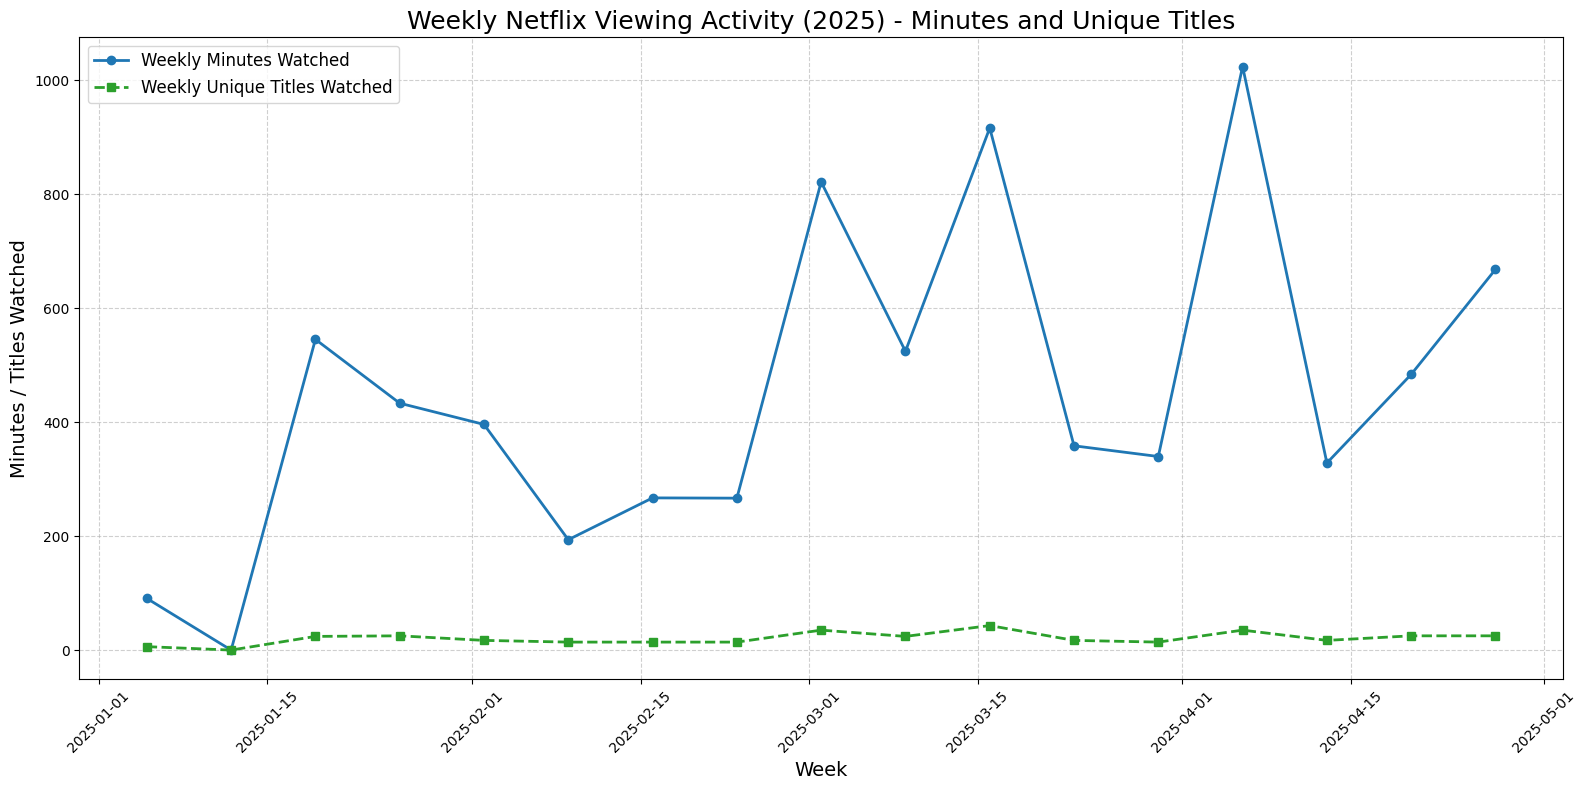

In [ ]:
# prompt: generate the code for netflix minutes and titles by week

import pandas as pd
import matplotlib.pyplot as plt
# Assuming watch_summary_per_day DataFrame from the previous code is available

# Convert 'Date' column to datetime objects
watch_summary_per_day['Date'] = pd.to_datetime(watch_summary_per_day['Date'])

# Set 'Date' as the index
watch_summary_per_day = watch_summary_per_day.set_index('Date')

# Resample to weekly frequency
weekly_netflix = watch_summary_per_day.resample('W').agg({
    'Minutes Watched': 'sum',
    'Unique Titles Watched': 'sum'
})

# Display the weekly Netflix data
print(weekly_netflix)


# Plot weekly Netflix viewing activity
plt.figure(figsize=(16,8))

# Plot Minutes Watched per Week
plt.plot(weekly_netflix.index, weekly_netflix['Minutes Watched'], marker='o', label='Weekly Minutes Watched', color='tab:blue', linewidth=2)

# Plot Unique Titles Watched per Week
plt.plot(weekly_netflix.index, weekly_netflix['Unique Titles Watched'], marker='s', linestyle='--', label='Weekly Unique Titles Watched', color='tab:green', linewidth=2)

# Titles and labels
plt.title('Weekly Netflix Viewing Activity (2025) - Minutes and Unique Titles', fontsize=18)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Minutes / Titles Watched', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### **FOOD PURCHASES**

In [ ]:
# STEP 1: Install openpyxl if needed
!pip install openpyxl

# STEP 2: Upload the file
from google.colab import files
uploaded = files.upload()

# STEP 3: Read the file
import pandas as pd

df = pd.read_excel(next(iter(uploaded)), engine='openpyxl')

# STEP 4: Convert Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# STEP 5: Food-related keywords
food_keywords = [
    'RESTAURANT', 'CAFE', 'FOOD', 'CINNABON', 'TACOS', 'WENDYS', 'CHIPOTLE',
    'TRADER JOE', 'KROGER', 'DOMINO', 'DOORDASH', 'MCDONALDS', 'SMOOTHIE',
    'COOK OUT', 'CAVA', 'TACO BELL', 'WAWA', 'CHILIS', 'GOT DUMPLINGS',
    '7-ELEVEN', 'BAGELS', 'WAYSIDE', 'SUBWAY', 'SUSHI', 'EL TIO', 'BODOS',
    'GOMEZ', 'RAISING CANES', 'ZAXBY', 'UEP*GOT', 'LATINA ROSY',
    'THE MARKET AT', 'TIKKA'
]

# STEP 6: Label food transactions
def label_food(description):
    description_upper = str(description).upper()
    return int(any(keyword in description_upper for keyword in food_keywords))

df['FoodLabel'] = df['Transaction'].apply(label_food)

# STEP 7: Group by Date and sum FoodLabel
daily_food = df.groupby('Date')['FoodLabel'].sum().reset_index()

# STEP 8: Create full date range
full_dates = pd.DataFrame({'Date': pd.date_range(start='2025-01-01', end='2025-04-25')})

# STEP 9: Merge full dates with transaction data
final = full_dates.merge(daily_food, on='Date', how='left')
final['FoodLabel'] = final['FoodLabel'].fillna(0).astype(int)

# Expand display so all rows and columns are shown
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now print the full dataframe
print(final)


Saving transactions.xlsx to transactions (2).xlsx
          Date  FoodLabel
0   2025-01-01          0
1   2025-01-02          4
2   2025-01-03          0
3   2025-01-04          0
4   2025-01-05          0
5   2025-01-06          2
6   2025-01-07          0
7   2025-01-08          6
8   2025-01-09          1
9   2025-01-10          0
10  2025-01-11          0
11  2025-01-12          0
12  2025-01-13          4
13  2025-01-14          0
14  2025-01-15          0
15  2025-01-16          0
16  2025-01-17          0
17  2025-01-18          0
18  2025-01-19          0
19  2025-01-20          0
20  2025-01-21          0
21  2025-01-22          0
22  2025-01-23          0
23  2025-01-24          0
24  2025-01-25          0
25  2025-01-26          0
26  2025-01-27          4
27  2025-01-28          0
28  2025-01-29          0
29  2025-01-30          0
30  2025-01-31          0
31  2025-02-01          0
32  2025-02-02          0
33  2025-02-03          1
34  2025-02-04          0
35  2025-02-05

In [ ]:
# First, make sure Date is datetime and set as index
final_df = df.copy()  # Go back to your original dataframe with 'Date', 'Transaction', 'Amount'

# Label food again if needed
food_keywords = [
    'RESTAURANT', 'CAFE', 'FOOD', 'CINNABON', 'TACOS', 'WENDYS', 'CHIPOTLE',
    'TRADER JOE', 'KROGER', 'DOMINO', 'DOORDASH', 'MCDONALDS', 'SMOOTHIE',
    'COOK OUT', 'CAVA', 'TACO BELL', 'WAWA', 'CHILIS', 'GOT DUMPLINGS',
    '7-ELEVEN', 'BAGELS', 'WAYSIDE', 'SUBWAY', 'SUSHI', 'EL TIO', 'BODOS',
    'GOMEZ', 'RAISING CANES', 'ZAXBY', 'UEP*GOT', 'LATINA ROSY',
    'THE MARKET AT', 'TIKKA'
]

def label_food(description):
    description_upper = str(description).upper()
    return int(any(keyword in description_upper for keyword in food_keywords))

final_df['FoodLabel'] = final_df['Transaction'].apply(label_food)

# STEP 1: Filter only food purchases
food_only = final_df[final_df['FoodLabel'] == 1]

# STEP 2: Set Date as index
food_only = food_only.set_index('Date')

# STEP 3: Now group by WEEK
weekly_summary = food_only.resample('W').agg({
    'Transaction': 'count',    # number of food transactions
    'Amount': 'sum'             # sum of cost of food purchases
}).reset_index()

# STEP 4: Rename columns nicely
weekly_summary.rename(columns={
    'Transaction': 'WeeklyFoodTransactionCount',
    'Amount': 'WeeklyFoodPurchaseSum'
}, inplace=True)

# STEP 5: See the final weekly summary
print(weekly_summary)



         Date  WeeklyFoodTransactionCount  WeeklyFoodPurchaseSum
0  2025-01-05                           4                 -13.18
1  2025-01-12                           9                 -88.60
2  2025-01-19                           4                 -96.92
3  2025-01-26                           0                   0.00
4  2025-02-02                           4                -265.28
5  2025-02-09                           4                -107.08
6  2025-02-16                           4                -276.07
7  2025-02-23                           4                 -47.66
8  2025-03-02                           6                -280.00
9  2025-03-09                           4                 -86.54
10 2025-03-16                           2                 -61.00
11 2025-03-23                           5                -295.14
12 2025-03-30                           5                 -91.91
13 2025-04-06                          13                -214.94
14 2025-04-13            

In [ ]:
final_df = df.copy()  # Go back to your original dataframe with 'Date', 'Transaction', 'Amount'
# --- STEP 1: Label Food Purchases ---
food_keywords = [
    'RESTAURANT', 'CAFE', 'FOOD', 'CINNABON', 'TACOS', 'WENDYS', 'CHIPOTLE',
    'TRADER JOE', 'KROGER', 'DOMINO', 'DOORDASH', 'MCDONALDS', 'SMOOTHIE',
    'COOK OUT', 'CAVA', 'TACO BELL', 'WAWA', 'CHILIS', 'GOT DUMPLINGS',
    '7-ELEVEN', 'BAGELS', 'WAYSIDE', 'SUBWAY', 'SUSHI', 'EL TIO', 'BODOS',
    'GOMEZ', 'RAISING CANES', 'ZAXBY', 'UEP*GOT', 'LATINA ROSY',
    'THE MARKET AT', 'TIKKA'
]

def label_food(description):
    description_upper = str(description).upper()
    return int(any(keyword in description_upper for keyword in food_keywords))

final_df = df.copy()
final_df['FoodLabel'] = final_df['Transaction'].apply(label_food)

# --- STEP 2: Filter only food purchases ---
food_only = final_df[final_df['FoodLabel'] == 1]

# --- STEP 3: Set Date as datetime and as index ---
food_only['Date'] = pd.to_datetime(food_only['Date'])
food_only = food_only.set_index('Date')

# --- STEP 4: Group by DAY now (not week) ---
daily_summary = food_only.resample('D').agg({
    'Transaction': 'count',    # number of food transactions
    'Amount': 'sum'             # sum of cost of food purchases
}).reset_index()

# --- STEP 5: Rename columns nicely ---
daily_summary.rename(columns={
    'Transaction': 'DailyFoodTransactionCount',
    'Amount': 'DailyFoodPurchaseSum'
}, inplace=True)

# --- STEP 6: See the final daily summary ---
print(daily_summary)


          Date  DailyFoodTransactionCount  DailyFoodPurchaseSum
0   2025-01-02                          4                -13.18
1   2025-01-03                          0                  0.00
2   2025-01-04                          0                  0.00
3   2025-01-05                          0                  0.00
4   2025-01-06                          2                -16.55
5   2025-01-07                          0                  0.00
6   2025-01-08                          6                -28.31
7   2025-01-09                          1                -43.74
8   2025-01-10                          0                  0.00
9   2025-01-11                          0                  0.00
10  2025-01-12                          0                  0.00
11  2025-01-13                          4                -96.92
12  2025-01-14                          0                  0.00
13  2025-01-15                          0                  0.00
14  2025-01-16                          

<ipython-input-86-e42dc2181359>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_only['Date'] = pd.to_datetime(food_only['Date'])


### **COMBINE EVERYTHING**

In [ ]:
combined['Date'] = pd.to_datetime(combined['Week Start'])
weekly_df['Date'] = pd.to_datetime(weekly_df['Date'])
weekly_netflix = weekly_netflix.reset_index()
weekly_netflix['Date'] = pd.to_datetime(weekly_netflix['Date'])
weekly_summary['Date'] = pd.to_datetime(weekly_summary['Date'])

merged = combined[['Date', 'Homework Assignments', 'Exam Assignments', 'School Assignments', 'Busy Academic']]

merged = merged.merge(weekly_df, on='Date', how='outer')

merged = merged.merge(weekly_netflix[['Date', 'Minutes Watched', 'Unique Titles Watched']], on='Date', how='outer')

merged = merged.merge(weekly_summary[['Date', 'WeeklyFoodTransactionCount', 'WeeklyFoodPurchaseSum']], on='Date', how='outer')

merged = merged.sort_values('Date').reset_index(drop=True)
merged = merged.fillna(0)

print(merged)


         Date  Homework Assignments  Exam Assignments  School Assignments  \
0  2025-01-05                   0.0               0.0                 0.0   
1  2025-01-12                   0.0               0.0                 0.0   
2  2025-01-13                   0.0               0.0                 0.0   
3  2025-01-19                   0.0               0.0                 0.0   
4  2025-01-20                   3.0               0.0                 3.0   
5  2025-01-26                   0.0               0.0                 0.0   
6  2025-01-27                   4.0               0.0                 4.0   
7  2025-02-02                   0.0               0.0                 0.0   
8  2025-02-03                   5.0               0.0                 5.0   
9  2025-02-09                   0.0               0.0                 0.0   
10 2025-02-10                   6.0               1.0                 7.0   
11 2025-02-16                   0.0               0.0                 0.0   

In [ ]:
import pandas as pd

# --- Step 1: Make sure Date columns are correct everywhere ---

# Parse Date as datetime for all datasets
daily_df['Date'] = pd.to_datetime(daily_df['Date'])
notes_df['Date'] = pd.to_datetime(notes_df['Date'])
daily_summary['Date'] = pd.to_datetime(daily_summary['Date'])

# For Netflix data, fix the fact that Date was index
watch_summary_per_day = watch_summary_per_day.reset_index()
watch_summary_per_day['Date'] = pd.to_datetime(watch_summary_per_day['Date'])

# --- Step 2: Start merging ---

# Start from only the Significant Academic Day signal
merged_daily = daily_df[['Date', 'Significant_Academic_Day']].copy()

# Merge in Notes data (Number of Notes, Sentiment, School Score)
merged_daily = merged_daily.merge(
    notes_df[['Date', 'Number of Notes', 'Average Sentiment Score', 'Average School Score']],
    on='Date', how='left'
)

# Merge in Netflix watch data (Minutes Watched, Unique Titles Watched)
merged_daily = merged_daily.merge(
    watch_summary_per_day[['Date', 'Minutes Watched', 'Unique Titles Watched']],
    on='Date', how='left'
)

# Merge in Food purchase data (DailyFoodTransactionCount, DailyFoodPurchaseSum)
merged_daily = merged_daily.merge(
    daily_summary[['Date', 'DailyFoodTransactionCount', 'DailyFoodPurchaseSum']],
    on='Date', how='left'
)

# --- Step 3: Post-processing ---

# Sort by Date and reset index
merged_daily = merged_daily.sort_values('Date').reset_index(drop=True)

# Fill missing values with 0
merged_daily = merged_daily.fillna(0)

# --- Step 4: Print the final merged DataFrame ---
print(merged_daily)

# (Optional) Save to CSV
# merged_daily.to_csv('/content/merged_daily_final.csv', index=False)


          Date  Significant_Academic_Day  Number of Notes  \
0   2025-01-01                         1              0.0   
1   2025-01-02                         1              3.0   
2   2025-01-03                         1              6.0   
3   2025-01-04                         1              0.0   
4   2025-01-05                         1              0.0   
5   2025-01-06                         1              1.0   
6   2025-01-07                         1              0.0   
7   2025-01-08                         1              0.0   
8   2025-01-09                         1              4.0   
9   2025-01-10                         1              1.0   
10  2025-01-11                         0              4.0   
11  2025-01-12                         0              0.0   
12  2025-01-13                         1              0.0   
13  2025-01-14                         0              0.0   
14  2025-01-15                         0              2.0   
15  2025-01-16          

### **Online Behavior Correlations**

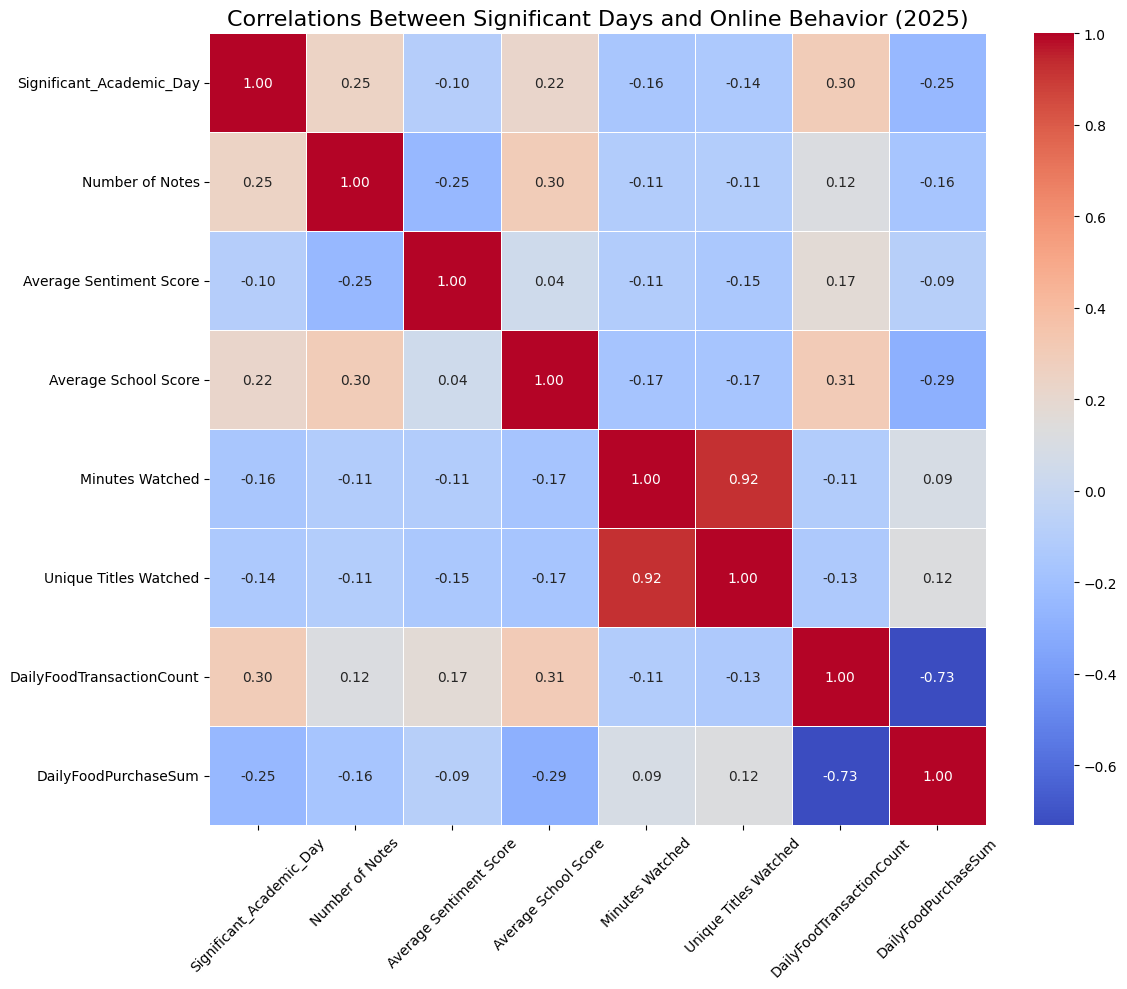

                           Significant_Academic_Day  Number of Notes  \
Significant_Academic_Day                   1.000000         0.248747   
Number of Notes                            0.248747         1.000000   
Average Sentiment Score                   -0.100344        -0.246541   
Average School Score                       0.218080         0.299986   
Minutes Watched                           -0.157430        -0.109952   
Unique Titles Watched                     -0.142138        -0.106511   
DailyFoodTransactionCount                  0.302188         0.119691   
DailyFoodPurchaseSum                      -0.249201        -0.163581   

                           Average Sentiment Score  Average School Score  \
Significant_Academic_Day                 -0.100344              0.218080   
Number of Notes                          -0.246541              0.299986   
Average Sentiment Score                   1.000000              0.040429   
Average School Score                      0.040

In [ ]:
# 1. Select only the columns you want to correlate
online_behavior_cols = [
    'Significant_Academic_Day',   # <-- now use this instead of School Assignments
    'Number of Notes',
    'Average Sentiment Score',
    'Average School Score',
    'Minutes Watched',
    'Unique Titles Watched',
    'DailyFoodTransactionCount',
    'DailyFoodPurchaseSum'
]

# 2. Compute the correlation matrix
correlations = merged_daily[online_behavior_cols].corr()

# 3. Display nicely
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlations Between Significant Days and Online Behavior (2025)', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Also print numeric table
print(correlations)


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Corrected list of daily columns
columns_to_check = [
    'Significant_Academic_Day',  # <-- use this instead of School Assignments
    'Number of Notes',
    'Average Sentiment Score',
    'Average School Score',
    'Minutes Watched',
    'Unique Titles Watched',
    'DailyFoodTransactionCount',  # <-- corrected
    'DailyFoodPurchaseSum'         # <-- corrected
]

# Run Shapiro-Wilk test for each column
for col in columns_to_check:
    stat, p = shapiro(merged_daily[col])
    result = 'Normal' if p > 0.05 else 'Not Normal'
    print(f'{col}: p-value = {p:.8f} → {result}')


Significant_Academic_Day: p-value = 0.00000000 → Not Normal
Number of Notes: p-value = 0.00000000 → Not Normal
Average Sentiment Score: p-value = 0.00000000 → Not Normal
Average School Score: p-value = 0.00000000 → Not Normal
Minutes Watched: p-value = 0.00000000 → Not Normal
Unique Titles Watched: p-value = 0.00000000 → Not Normal
DailyFoodTransactionCount: p-value = 0.00000000 → Not Normal
DailyFoodPurchaseSum: p-value = 0.00000000 → Not Normal


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# --- Corrected list of columns ---
columns_to_check = [
    'Significant_Academic_Day',   # <--- corrected
    'Number of Notes',
    'Average Sentiment Score',
    'Average School Score',
    'Minutes Watched',
    'Unique Titles Watched',
    'DailyFoodTransactionCount',   # <--- corrected
    'DailyFoodPurchaseSum'          # <--- corrected
]

# --- Compute Spearman correlations and p-values ---
significant_strong_correlations = []

for i in range(len(columns_to_check)):
    for j in range(i + 1, len(columns_to_check)):
        col1 = columns_to_check[i]
        col2 = columns_to_check[j]

        rho, p = spearmanr(merged_daily[col1], merged_daily[col2])  # <--- use merged_daily

        # Only keep if p < 0.05 and |rho| > 0.5
        if p < 0.05 and abs(rho) > 0.5:
            significant_strong_correlations.append((col1, col2, rho, p))

# Sort by absolute correlation strength
significant_strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# --- Print nicely ---
print("Statistically Significant and Strong Correlations (|rho| > 0.5, p < 0.05):")
for col1, col2, rho, p in significant_strong_correlations:
    print(f"{col1} vs {col2}: Spearman rho = {rho:.4f}, p = {p:.8f}")


Statistically Significant and Strong Correlations (|rho| > 0.5, p < 0.05):
DailyFoodTransactionCount vs DailyFoodPurchaseSum: Spearman rho = -0.9401, p = 0.00000000
Minutes Watched vs Unique Titles Watched: Spearman rho = 0.9396, p = 0.00000000


### **BINARY DATA**

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# --- 1. merged_daily already has Date as index ---

# --- 2. Your binary variable ---
significant_series = merged_daily['Significant_Academic_Day']

# --- 3. Threshold online behavior into spikes/drops ---
threshold_multiplier = 1.0

columns_to_threshold = [
    'Number of Notes',
    'Average Sentiment Score',
    'Average School Score',
    'Minutes Watched',
    'Unique Titles Watched',
    'DailyFoodTransactionCount',
    'DailyFoodPurchaseSum'
]

binary_behavior = pd.DataFrame(index=merged_daily.index)

for col in columns_to_threshold:
    mean_val = merged_daily[col].mean()
    std_val = merged_daily[col].std()

    binary_behavior[col + '_positive_spike'] = (merged_daily[col] > mean_val + threshold_multiplier * std_val).astype(int)
    binary_behavior[col + '_negative_drop'] = (merged_daily[col] < mean_val - threshold_multiplier * std_val).astype(int)

# --- 4. Compute Pearson correlations ---
all_results = {}
significant_results = []

for col in binary_behavior.columns:
    corr, pval = pearsonr(significant_series, binary_behavior[col])
    all_results[col] = (corr, pval)

    if abs(corr) > 0.2 and pval < 0.05:
        significant_results.append((col, corr, pval))

# --- 5. Display all correlations ---
print("\n=== All Correlation Results with Significant Academic Day ===\n")
for col, (corr, pval) in all_results.items():
    print(f"{col}: correlation = {corr:.3f}, p-value = {pval:.4f}")

# --- 6. Display only significant ones ---
print("\n=== Statistically Significant and Strong Correlations (|corr| > 0.2, p < 0.05) ===\n")
if significant_results:
    significant_results.sort(key=lambda x: abs(x[1]), reverse=True)

    for col, corr, pval in significant_results:
        print(f"{col}: correlation = {corr:.3f}, p-value = {pval:.4f}")
else:
    print("No strong and statistically significant correlations found.")



=== All Correlation Results with Significant Academic Day ===

Number of Notes_positive_spike: correlation = 0.154, p-value = 0.0983
Number of Notes_negative_drop: correlation = nan, p-value = nan
Average Sentiment Score_positive_spike: correlation = -0.166, p-value = 0.0743
Average Sentiment Score_negative_drop: correlation = 0.036, p-value = 0.7050
Average School Score_positive_spike: correlation = 0.230, p-value = 0.0131
Average School Score_negative_drop: correlation = nan, p-value = nan
Minutes Watched_positive_spike: correlation = -0.166, p-value = 0.0752
Minutes Watched_negative_drop: correlation = nan, p-value = nan
Unique Titles Watched_positive_spike: correlation = -0.085, p-value = 0.3631
Unique Titles Watched_negative_drop: correlation = 0.180, p-value = 0.0534
DailyFoodTransactionCount_positive_spike: correlation = 0.270, p-value = 0.0033
DailyFoodTransactionCount_negative_drop: correlation = nan, p-value = nan
DailyFoodPurchaseSum_positive_spike: correlation = nan, p-val

<ipython-input-90-e5aa40b72671>:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(significant_series, binary_behavior[col])


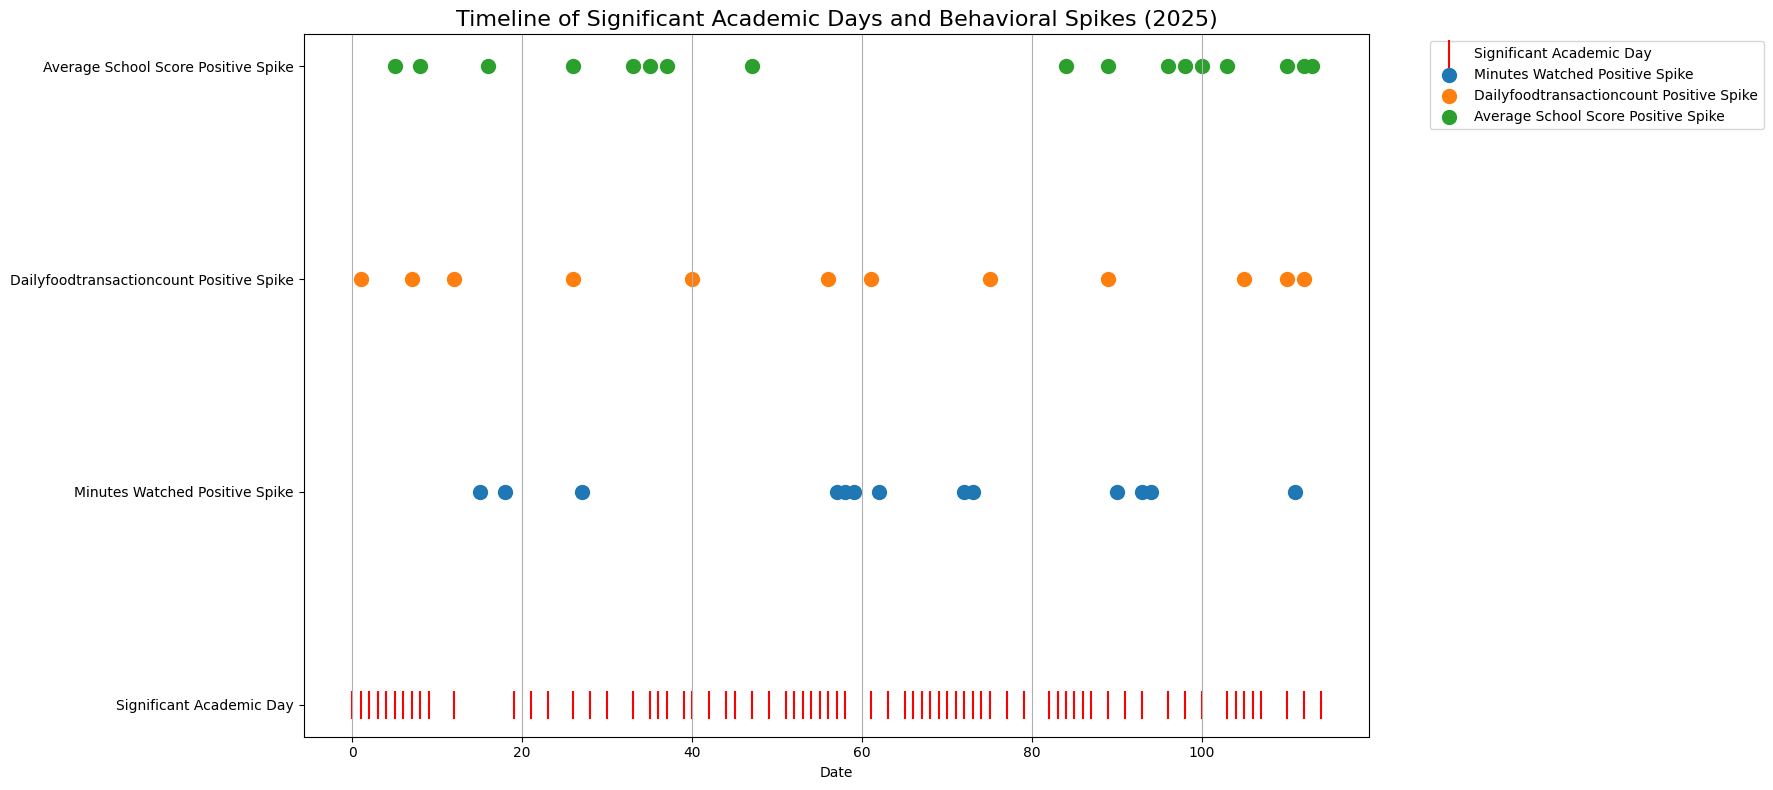

In [ ]:
import matplotlib.pyplot as plt

# -------------------------
# 1. Pick a few interesting behaviors to visualize
# -------------------------
# You can change which behaviors you want to plot!
behaviors_to_plot = [
    'Minutes Watched_positive_spike',
    'DailyFoodTransactionCount_positive_spike',
    'Average School Score_positive_spike'
]

# -------------------------
# 2. Prepare the figure
# -------------------------
plt.figure(figsize=(18, 8))

# Vertical offset for stacking each behavior
offset = 0

# -------------------------
# 3. Plot Significant Academic Days
# -------------------------
plt.scatter(
    merged_daily.index[merged_daily['Significant_Academic_Day'] == 1],
    [offset] * sum(merged_daily['Significant_Academic_Day']),
    color='red',
    marker='|',
    s=400,
    label='Significant Academic Day'
)

offset += 1  # Move up

# -------------------------
# 4. Plot each behavior's spikes
# -------------------------
for behavior in behaviors_to_plot:
    if behavior in binary_behavior.columns:
        spike_dates = binary_behavior.index[binary_behavior[behavior] == 1]
        plt.scatter(
            spike_dates,
            [offset] * len(spike_dates),
            label=behavior.replace('_', ' ').title(),
            s=100
        )
        offset += 1  # Move up for next behavior

# -------------------------
# 5. Finishing touches
# -------------------------
plt.title('Timeline of Significant Academic Days and Behavioral Spikes (2025)', fontsize=16)
plt.yticks(
    range(len(behaviors_to_plot) + 1),
    ['Significant Academic Day'] + [b.replace('_', ' ').title() for b in behaviors_to_plot]
)
plt.xlabel('Date')
plt.grid(True, axis='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
